Notebook color scheme


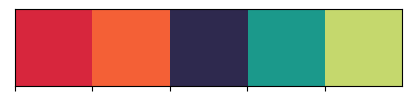

In [75]:
from typing import List, Tuple, Any, Dict, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import random
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, HalvingRandomSearchCV, HalvingGridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import auc, precision_recall_curve, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display_markdown, display_latex
from matplotlib.colors import ListedColormap

from datetime import datetime
from tqdm import tqdm
from colorama import Fore, Style

warnings.filterwarnings('ignore')

class clr:
    S = Style.BRIGHT + Fore.RED
    E = Style.RESET_ALL
    
my_colors = ["#D7263D", "#F46036", "#2E294E","#1B998B", "#C5D86D"]
MY_CMAP = ListedColormap(my_colors)
print(clr.S+"Notebook color scheme"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()


# Basic Data Information

In [13]:
df = pd.read_csv("./data/clean_health - clean_health.csv")
df.head()

,papaId,createdAt,eventType,DeviceID,MessageID,Payload,path,hops,duckType,corrupted_device,corrupted_message,charging,counter,full,volts,board_temp,packet_loss,is_lost
0,OWL_HQ,2022-03-12 00:00:10.228,health,IRDUCK01,UV16,Counter:58 Charging:1 Full:0 Volts:-3.00 Temp:...,NaN,1,2,0,0,1,58,0,-3.0,-3.0,1.0,0
1,OWL_HQ,2022-03-12 00:01:47.498,health,HEALTHDK,DE1R,Counter:61 Charging:1 Full:0 Volts:-3.00 Temp:...,NaN,1,2,0,0,1,61,0,-3.0,-3.0,2.0,1
2,OWL_HQ,2022-03-12 00:02:10.415,health,IRDUCK01,6T9P,Counter:59 Charging:1 Full:0 Volts:-3.00 Temp:...,NaN,1,2,0,0,1,59,0,-3.0,-3.0,1.0,0
3,OWL_HQ,2022-03-12 00:03:47.629,health,HEALTHDK,UVR4,Counter:62 Charging:1 Full:0 Volts:-3.00 Temp:...,NaN,1,2,0,0,1,62,0,-3.0,-3.0,1.0,0
4,OWL_HQ,2022-03-12 00:05:47.495,health,HEALTHDK,DVI7,Counter:63 Charging:1 Full:0 Volts:-3.00 Temp:...,NaN,1,2,0,0,1,63,0,-3.0,-3.0,1.0,0


In [14]:
print(clr.S+"===== Dataset Information ======"+clr.E+"\n\n")
display_markdown(f"Number of `records` in the dataset : ${df.shape[0]}$", raw=True)
display_markdown(f"Number of `attributes` in the dataset : ${df.shape[1]}$", raw=True)
print("\n\n")

print(clr.S+"====== Unique values information ====="+clr.E+"\n\n")
spec_cols = ["eventType", "DeviceID", "hops", "duckType", "corrupted_device", 
             "charging", "corrupted_message", "counter", "full", "volts", "board_temp", "is_lost"]
for attr in spec_cols:
    display_markdown(f"Number of unique values in `{attr}` : ${df[attr].nunique()}$", raw=True)
    

===== Dataset Information ======




Number of `records` in the dataset : $92451$

Number of `attributes` in the dataset : $18$




====== Unique values information =====




Number of unique values in `eventType` : $1$

Number of unique values in `DeviceID` : $2$

Number of unique values in `hops` : $3$

Number of unique values in `duckType` : $2$

Number of unique values in `corrupted_device` : $1$

Number of unique values in `charging` : $2$

Number of unique values in `corrupted_message` : $1$

Number of unique values in `counter` : $52487$

Number of unique values in `full` : $1$

Number of unique values in `volts` : $72$

Number of unique values in `board_temp` : $298$

Number of unique values in `is_lost` : $2$

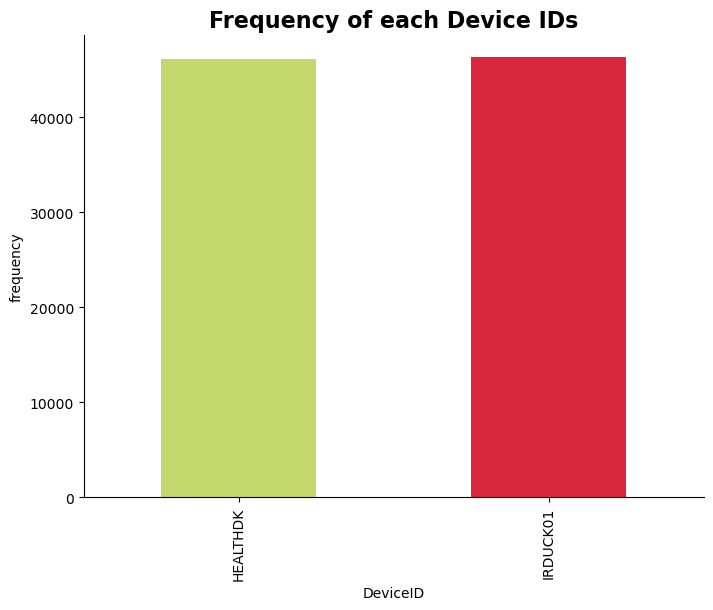

In [15]:
ax = df.groupby("DeviceID").size().plot(kind="bar", color=[my_colors[-1], my_colors[0]], figsize=(8, 6))
ax.set_title("Frequency of each Device IDs", fontsize=16, weight="bold")
ax.set_ylabel("frequency", fontsize=10)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

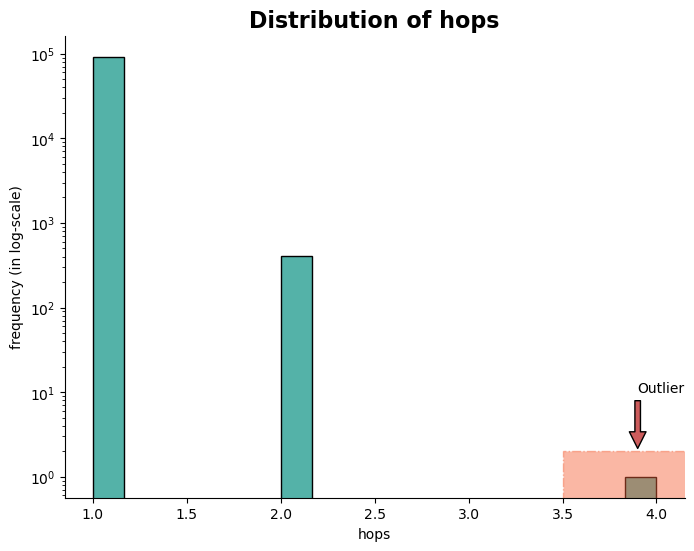

In [16]:
rect = plt.Rectangle((3.5, 0), 1, 2, color=my_colors[1], alpha=.45, linestyle="-.")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(data=df, x="hops", ax=ax, color=my_colors[-2])
ax.set_title("Distribution of hops", fontsize=16, weight="bold")
plt.yscale('log')
ax.set_ylabel("frequency (in log-scale)")
sns.despine()

ax.annotate("Outlier", (3.9, 2), xytext=(3.9, 10), arrowprops={"facecolor":"indianred", "shrink":0.05}, fontsize=10)
plt.gca().add_patch(rect)
plt.show()

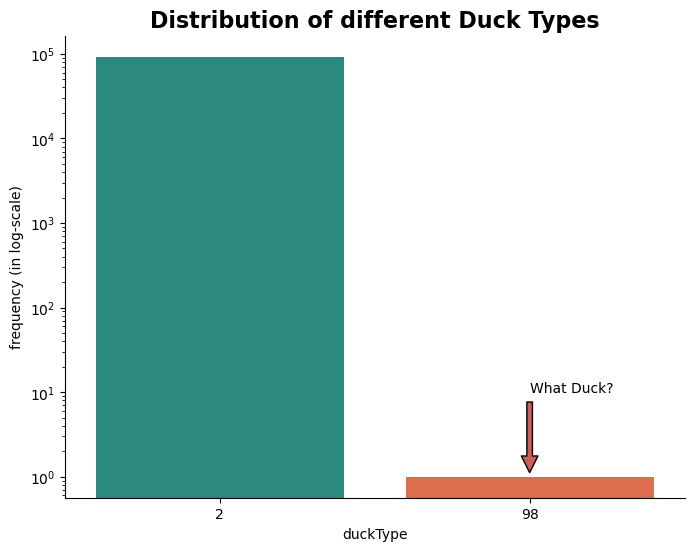

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=df, x="duckType", palette=[my_colors[-2], my_colors[1]], ax=ax)
ax.set_title("Distribution of different Duck Types", fontsize=16, weight="bold")
ax.set_yscale('log')
ax.set_ylabel("frequency (in log-scale)")
sns.despine()

ax.annotate("What Duck?", (1, 1), xytext=(1, 10), arrowprops={"facecolor":"indianred", "shrink":0.05})
plt.show()

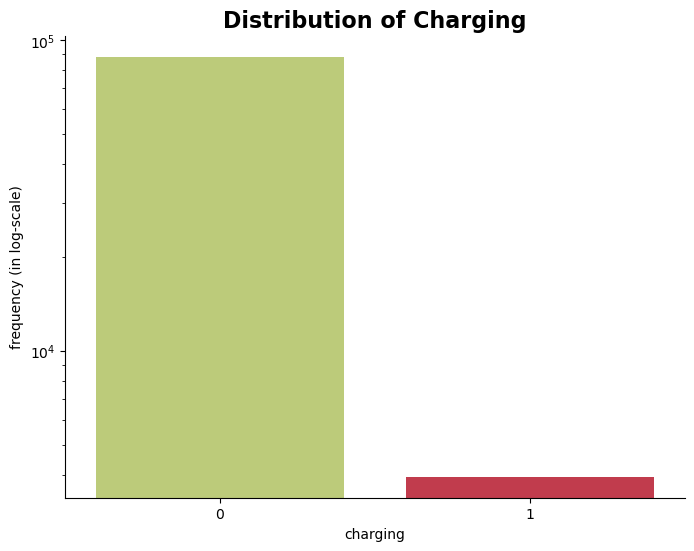

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=df, x="charging", palette=[my_colors[-1], my_colors[0]], ax=ax)
ax.set_title("Distribution of Charging", fontsize=16, weight="bold")
ax.set_yscale("log")
ax.set_ylabel("frequency (in log-scale)")
sns.despine()
plt.show()

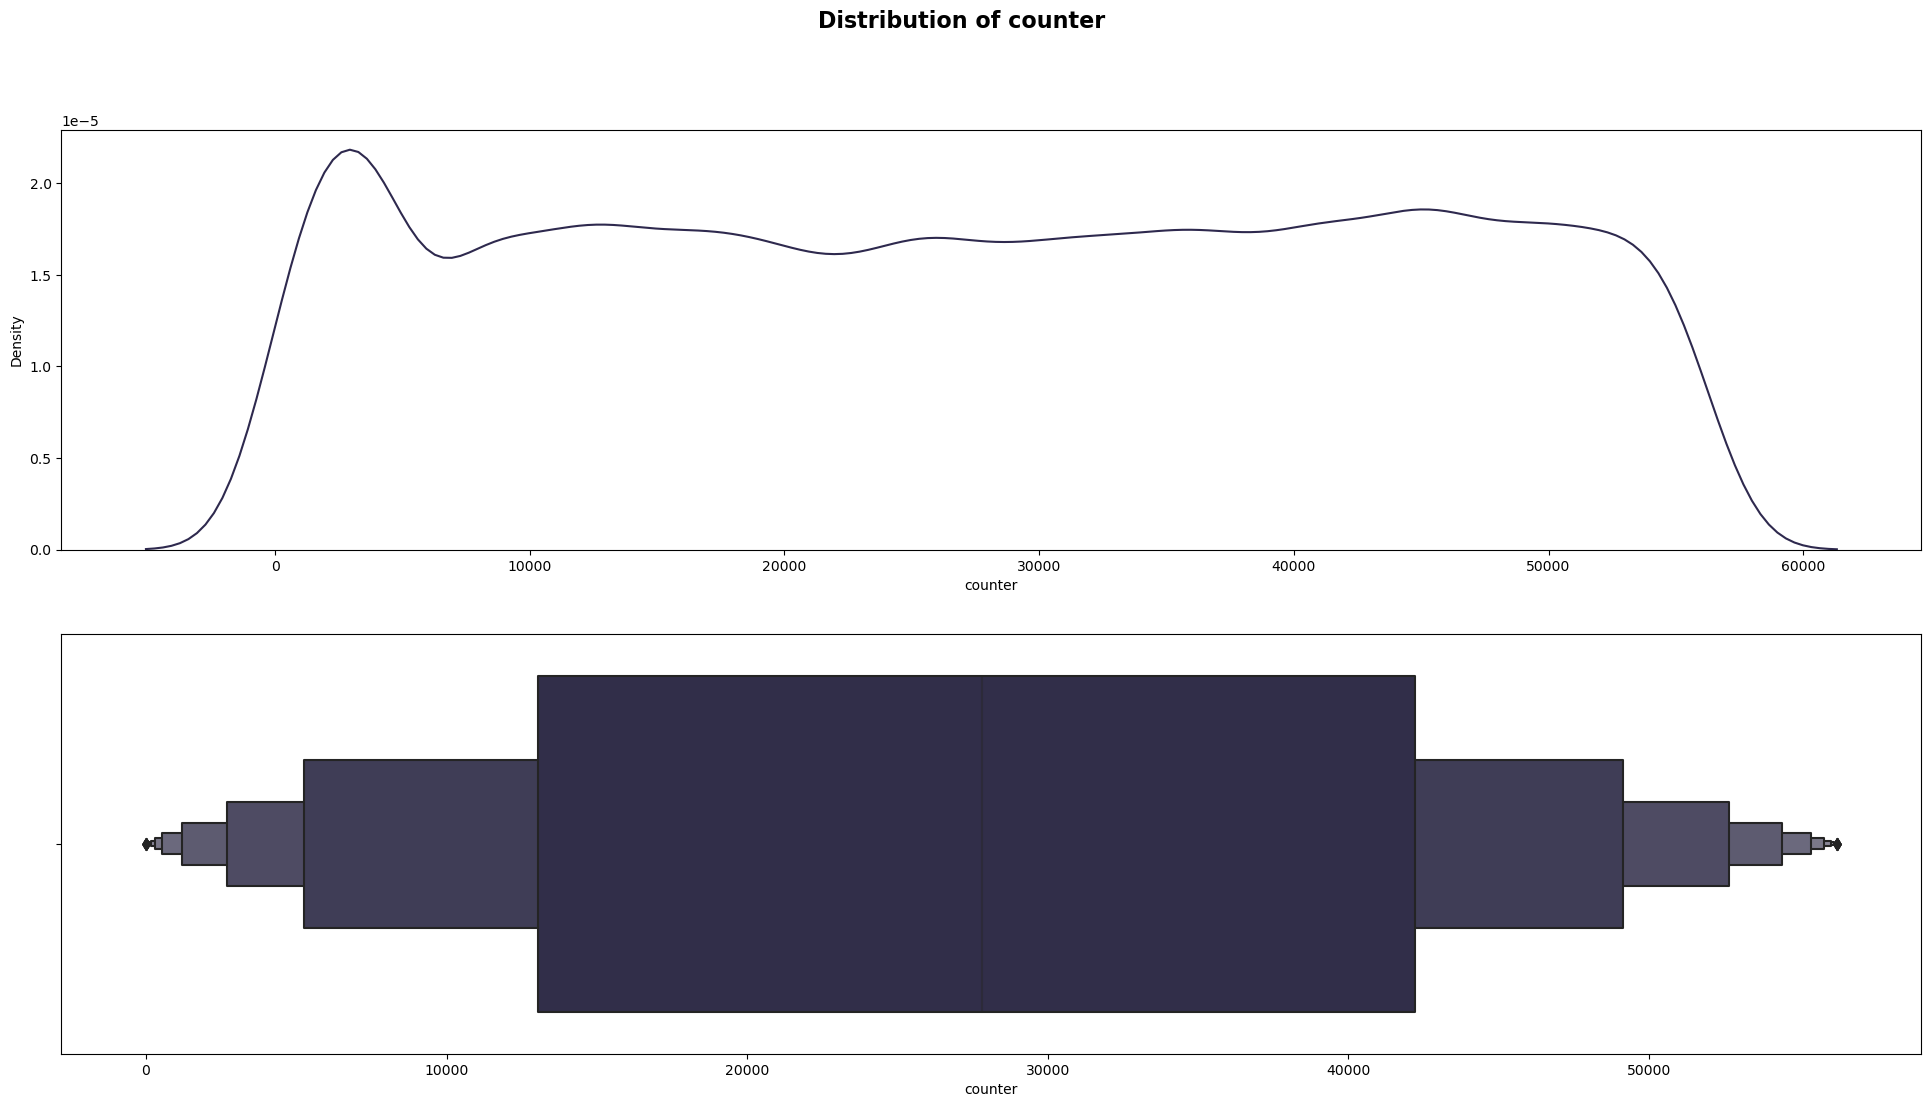

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(24, 12))
axs = axs.flatten()
sns.distplot(a=df["counter"], hist=False, color=my_colors[-3], ax=axs[0])
sns.boxenplot(data=df, x="counter", color=my_colors[-3], ax=axs[1])
fig.suptitle("Distribution of counter", fontsize=16, weight="bold")
plt.show()

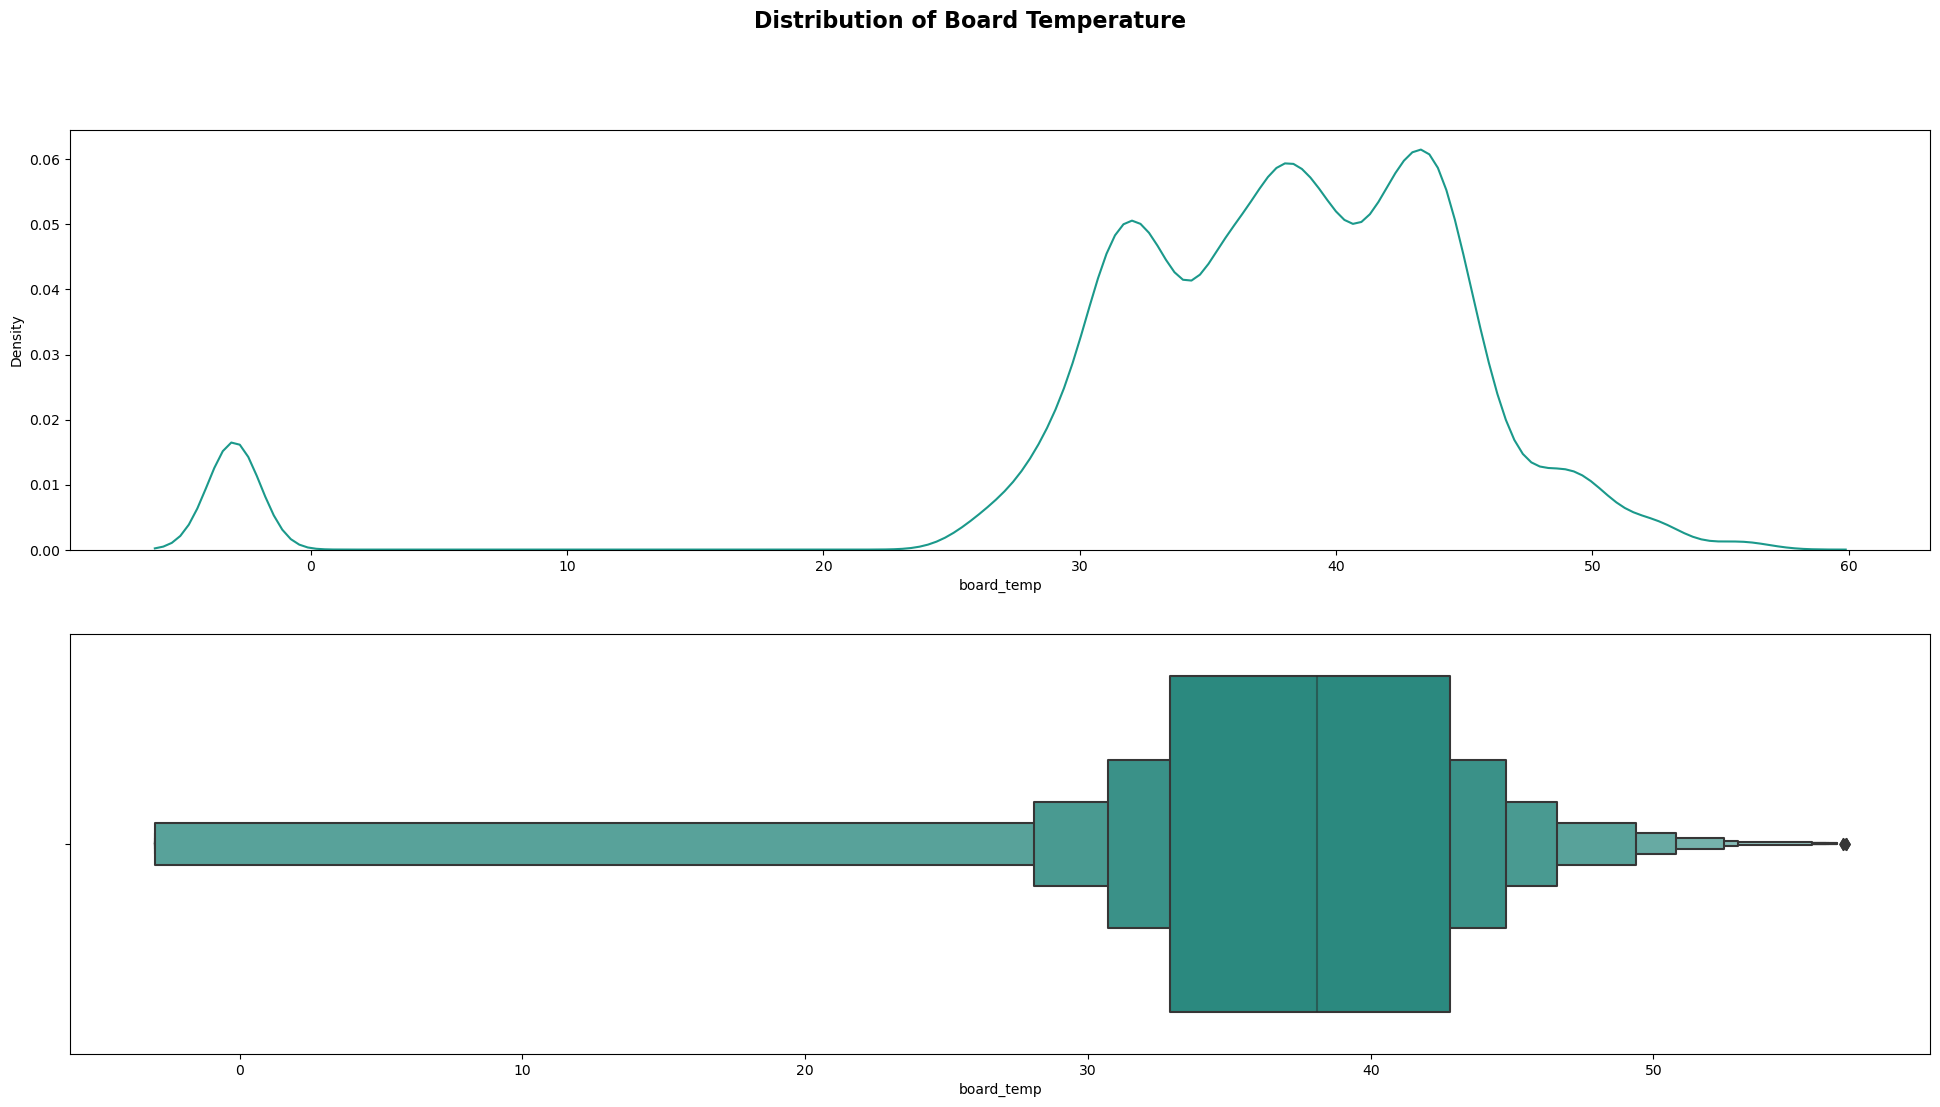

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(24, 12))
axs = axs.flatten()

sns.distplot(a=df["board_temp"], hist=False, ax=axs[0], color=my_colors[-2])
sns.boxenplot(data=df, x="board_temp", color=my_colors[-2], ax=axs[1])
fig.suptitle("Distribution of Board Temperature", fontsize=16, weight="bold")
plt.show()

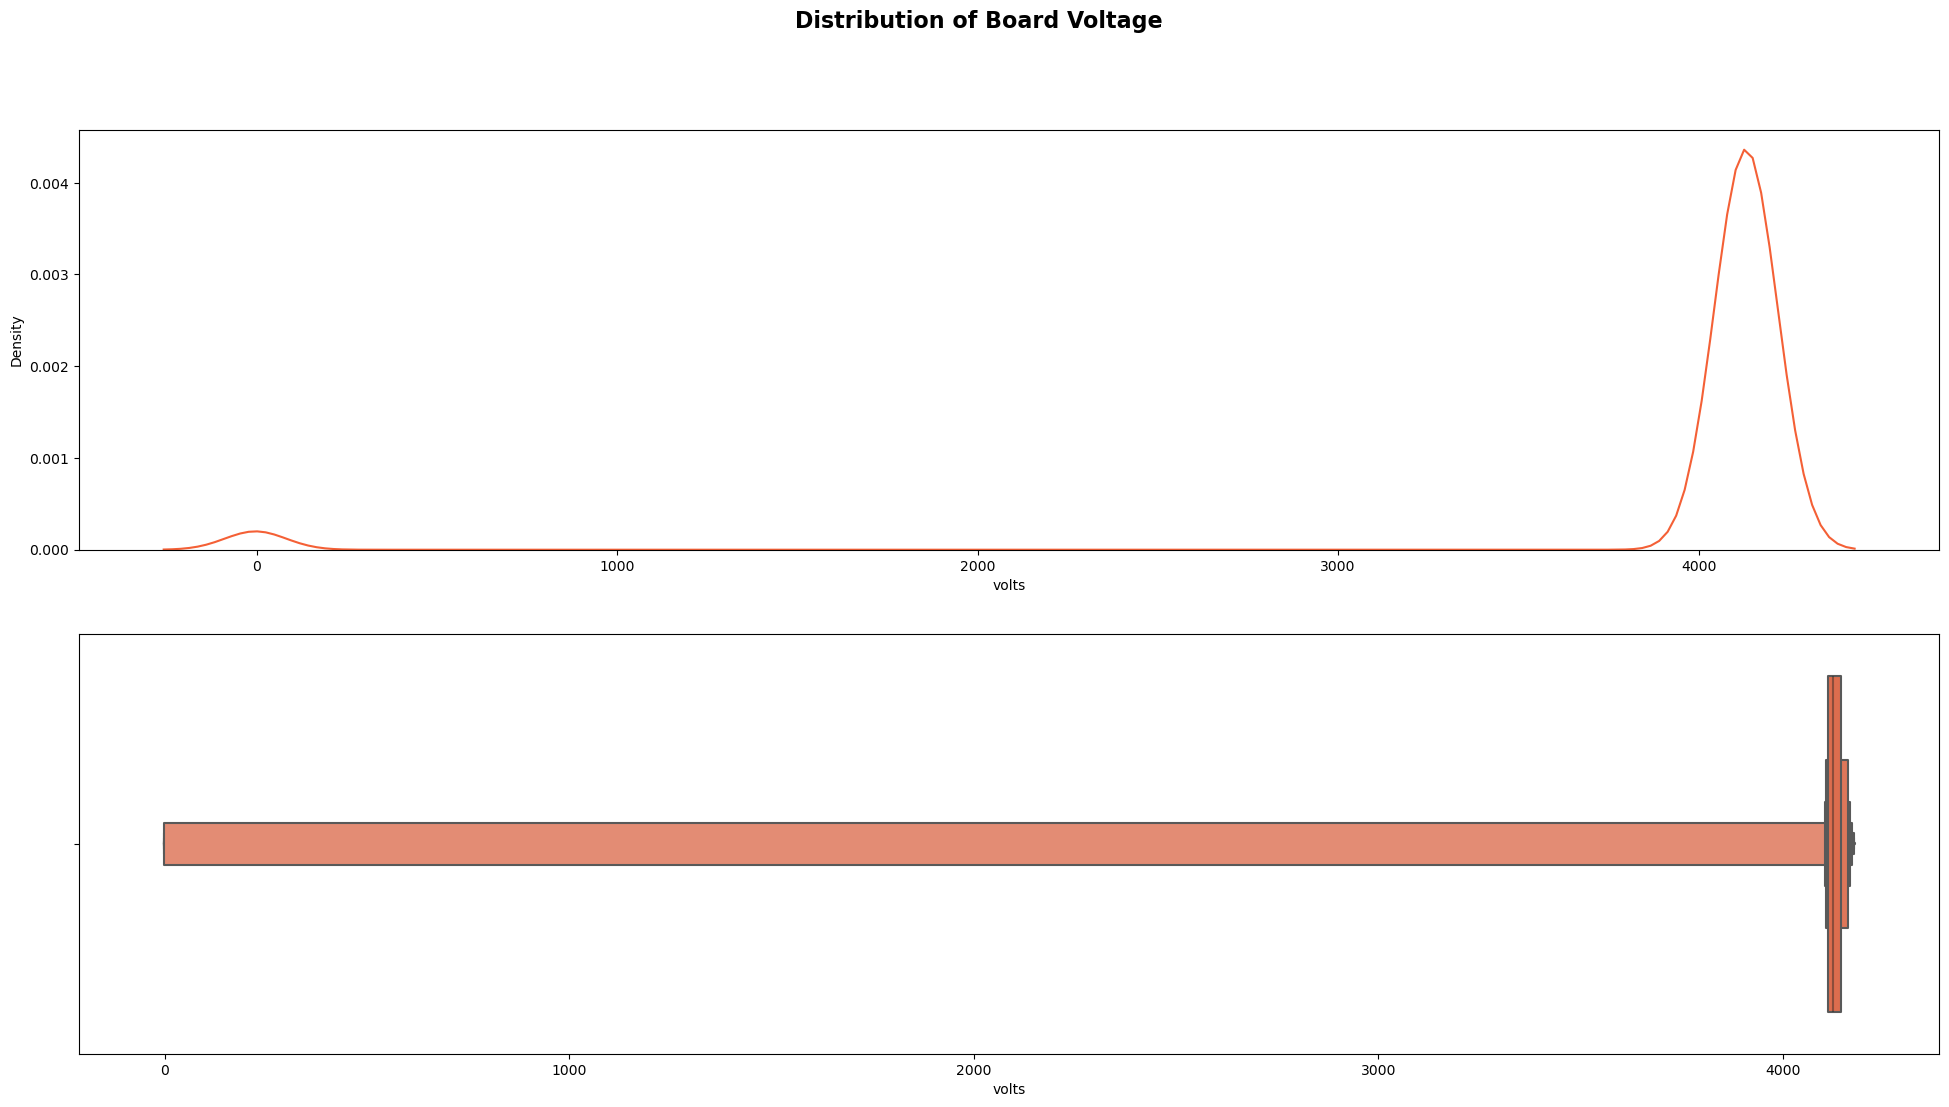

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(24, 12))
axs = axs.flatten()

sns.distplot(a=df["volts"], hist=False, ax=axs[0], color=my_colors[1])
sns.boxenplot(data=df, x="volts", color=my_colors[1], ax=axs[1])
fig.suptitle("Distribution of Board Voltage", fontsize=16, weight="bold")
plt.show()

# Distribution of Target Variable

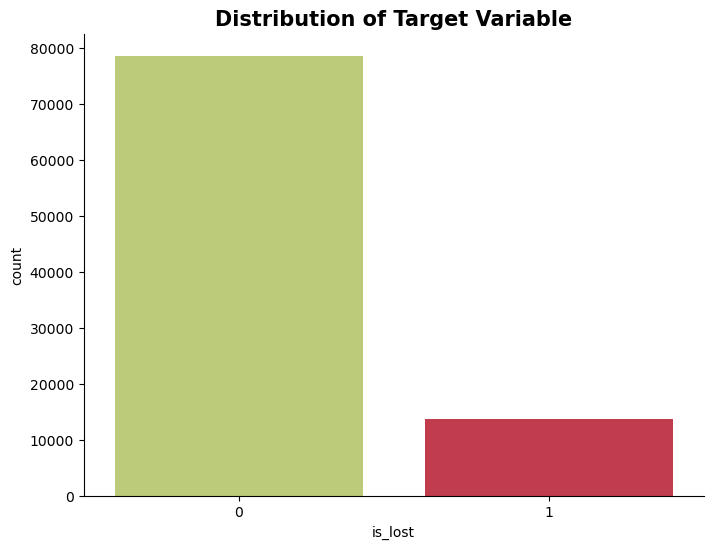

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=df, x="is_lost", ax=ax, palette=[my_colors[-1], my_colors[0]])
ax.set_title("Distribution of Target Variable", fontsize=15, weight="bold")
sns.despine()
plt.show()

# Data Modelling

## Creating a Subset of Data

In [51]:
df_mod = df[["DeviceID", "hops", "charging", "counter", "volts", "board_temp", "is_lost"]]

## Encoding DeviceID

In [52]:
label_device = LabelEncoder()
df_mod["DeviceID"] = label_device.fit_transform(df_mod["DeviceID"])

## Scaling the Data

In [53]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_mod[["hops", "counter", "volts", "board_temp"]])
df_mod[["hops", "counter", "volts", "board_temp"]] = scaled_feat

## Upsampling the Minority Class

In [64]:
# Upsampling the expensive data since we have limited amount

is_lost = df_mod.loc[df_mod["is_lost"] == 1,]
not_lost = df_mod.loc[df_mod["is_lost"] == 0,]

# upsample is_expensive
upsampled = resample(
    is_lost,
    replace=True, # sample with replacement
    n_samples=int(len(not_lost)*.50), # How many samples are needed
    random_state=42 # reproducible results
) 

upsampled.shape

(39342, 7)

In [65]:
upsampled_data = pd.concat([upsampled, not_lost])
upsampled_data.shape

(118027, 7)

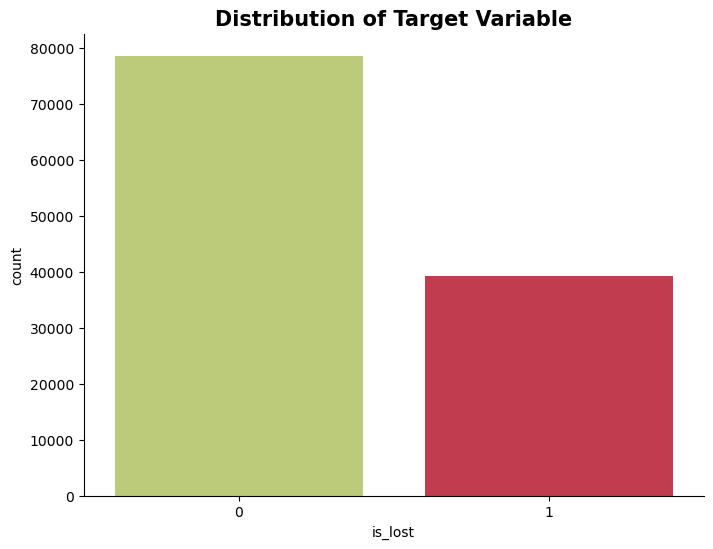

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=upsampled_data, x="is_lost", ax=ax, palette=[my_colors[-1], my_colors[0]])
ax.set_title("Distribution of Target Variable", fontsize=15, weight="bold")
sns.despine()
plt.show()

## Data Splitting

In [50]:
df_train, df_test = train_test_split(df_mod, test_size=0.05, random_state=42, stratify=df["is_lost"])
print(clr.S+"===== Training Data Information ====="+clr.E)
print("\n\n")
display_markdown(f"Number of records : ${df_train.shape[0]}$", raw=True)
display_markdown(f"Number of attributes : ${df_train.shape[1] - 1}$", raw=True)
print("\n\n")

print(clr.S+"===== Test Data Information ====="+clr.E)
print("\n\n")
display_markdown(f"Number of records : ${df_test.shape[0]}$", raw=True)
display_markdown(f"Number of attributes : ${df_test.shape[1] - 1}$", raw=True)

===== Training Data Information =====





Number of records : $87828$

Number of attributes : $6$




===== Test Data Information =====





Number of records : $4623$

Number of attributes : $6$

In [24]:
X_train, y_train = df_train.drop('is_lost', axis=1).values, df_train['is_lost'].values
X_test, y_test = df_test.drop('is_lost', axis=1).values, df_test['is_lost'].values

In [25]:
def my_custom_score(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    prec, rec, _ = precision_recall_curve(y_true, y_pred)
    area = auc(rec, prec)
    return area

score = make_scorer(my_custom_score, greater_is_better=True)

In [26]:
from sklearn.metrics import confusion_matrix

def confusion_display(y_true:np.ndarray, y_pred:np.ndarray) -> None:
    conf_mat = confusion_matrix(y_true, y_pred, normalize='true')
    
    grp = ["True Neg", "False Pos", "False Neg", "True Pos"]
    annot = [f"{x1}\n{np.round(x2, 2)}" for x1, x2 in zip(grp, conf_mat.flatten())]
    annot = np.array(annot).reshape(2, 2)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_title("Confusion Matrix", fontsize=16, weight="bold")
    sns.heatmap(conf_mat, annot=annot, fmt="", ax=ax,
                cmap=ListedColormap([my_colors[0], my_colors[1], my_colors[-2], my_colors[-1]]), cbar=False, linewidths=2.0)
    ax.set_xticklabels(["No LOSS", "LOSS"])
    ax.set_yticklabels(["No LOSS", "LOSS"])
    ax.set_xlabel("Predictions")
    ax.set_ylabel("Acutal")
    plt.show()
    

## - Logistic Regression (Baseline Model)

In [27]:
log_reg = LogisticRegression()
search_baseline = HalvingGridSearchCV(log_reg, 
                               {"C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4, 1e5]}, 
                               cv=RepeatedStratifiedKFold(random_state=1234), scoring=score, 
                               n_jobs=-1, random_state=412, verbose=1)
search_baseline.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 9758
max_resources_: 87828
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 11
n_resources: 9758
Fitting 50 folds for each of 11 candidates, totalling 550 fits
----------
iter: 1
n_candidates: 4
n_resources: 29274
Fitting 50 folds for each of 4 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 2
n_resources: 87822
Fitting 50 folds for each of 2 candidates, totalling 100 fits


HalvingGridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1234),
                    estimator=LogisticRegression(), n_jobs=-1,
                    param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                      10.0, 100.0, 1000.0, 10000.0, 100000.0]},
                    random_state=412, scoring=make_scorer(my_custom_score),
                    verbose=1)

In [28]:
search_baseline.best_params_

{'C': 10000.0}

In [29]:
search_baseline.best_score_

0.5744522759676253

In [30]:
log_reg = LogisticRegression(n_jobs=-1, random_state=42, **search_baseline.best_params_)
log_reg.fit(X_train, y_train)

baseline_class_rep = classification_report(y_test, log_reg.predict(X_test), target_names=["NO LOSS", "LOSS"])
print(baseline_class_rep)

              precision    recall  f1-score   support

     NO LOSS       0.85      1.00      0.92      3935
        LOSS       0.00      0.00      0.00       688

    accuracy                           0.85      4623
   macro avg       0.43      0.50      0.46      4623
weighted avg       0.72      0.85      0.78      4623



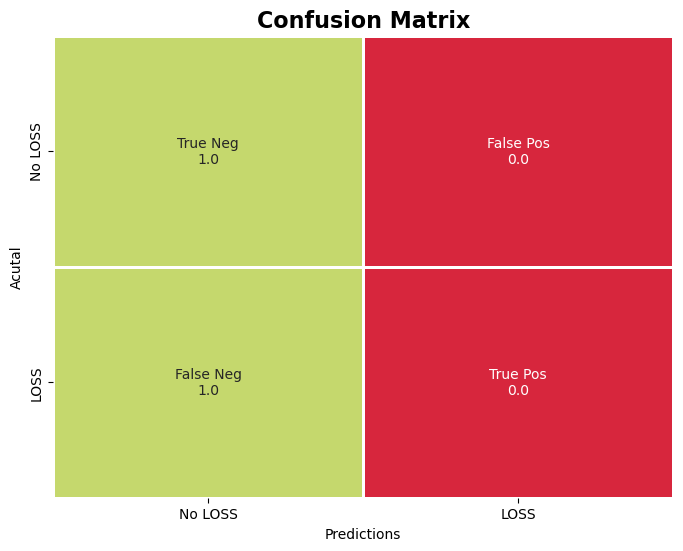

In [31]:
confusion_display(y_test, log_reg.predict(X_test))

In [32]:
neg, pos = np.bincount(df["is_lost"])

class_weight_0 = 1 - (neg/(pos + neg))
class_weight_1 = 1 - (pos/(pos + neg))

class_wts = {0:class_weight_0, 1:class_weight_1}
class_wts

{0: 0.1489004986425242, 1: 0.8510995013574758}

In [33]:
log_reg_class_wts = LogisticRegression(class_weight=class_wts, random_state=42)
search_baseline_class_wts = HalvingGridSearchCV(log_reg_class_wts, 
                               {"C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4, 1e5]}, 
                               cv=RepeatedStratifiedKFold(random_state=1234), scoring=score, 
                               n_jobs=-1, random_state=412, verbose=1)

search_baseline_class_wts.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 9758
max_resources_: 87828
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 11
n_resources: 9758
Fitting 50 folds for each of 11 candidates, totalling 550 fits
----------
iter: 1
n_candidates: 4
n_resources: 29274
Fitting 50 folds for each of 4 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 2
n_resources: 87822
Fitting 50 folds for each of 2 candidates, totalling 100 fits


HalvingGridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1234),
                    estimator=LogisticRegression(class_weight={0: 0.1489004986425242,
                                                               1: 0.8510995013574758},
                                                 random_state=42),
                    n_jobs=-1,
                    param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                      10.0, 100.0, 1000.0, 10000.0, 100000.0]},
                    random_state=412, scoring=make_scorer(my_custom_score),
                    verbose=1)

In [34]:
search_baseline_class_wts.best_params_

{'C': 0.01}

In [35]:
search_baseline_class_wts.best_score_

0.43076719111012385

In [36]:
log_reg_class_wts = LogisticRegression(class_weight=class_wts, random_state=42, **search_baseline_class_wts.best_params_)
log_reg_class_wts.fit(X_train, y_train)

baseline_class_wts_class_rep = classification_report(y_test, log_reg_class_wts.predict(X_test), target_names=["NO LOSS", "LOSS"])
print(baseline_class_wts_class_rep)

              precision    recall  f1-score   support

     NO LOSS       0.87      0.40      0.55      3935
        LOSS       0.16      0.66      0.26       688

    accuracy                           0.44      4623
   macro avg       0.52      0.53      0.40      4623
weighted avg       0.76      0.44      0.50      4623



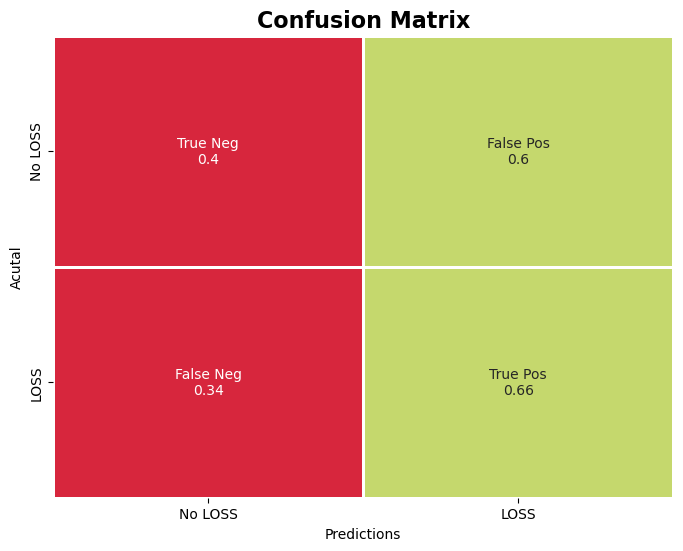

In [37]:
confusion_display(y_test, log_reg_class_wts.predict(X_test))

## Modeling on Upsampled Data

In [67]:
up_df_train, up_df_test = train_test_split(
    upsampled_data, 
    test_size=0.25, 
    random_state=42, 
    stratify=upsampled_data["is_lost"]
)

up_X_train, up_y_train = up_df_train.drop('is_lost', axis=1).values, up_df_train['is_lost'].values
up_X_test, up_y_test = up_df_test.drop('is_lost', axis=1).values, up_df_test['is_lost'].values

In [68]:
log_upsample = LogisticRegression()
search_upsample = HalvingGridSearchCV(
    log_upsample, 
    {"C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4, 1e5]}, 
    cv=RepeatedStratifiedKFold(random_state=42),
    scoring=score, 
    n_jobs=-1, 
    random_state=42, 
    verbose=1
)
search_upsample.fit(up_X_train, up_y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 9835
max_resources_: 88520
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 11
n_resources: 9835
Fitting 50 folds for each of 11 candidates, totalling 550 fits
----------
iter: 1
n_candidates: 4
n_resources: 29505
Fitting 50 folds for each of 4 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 2
n_resources: 88515
Fitting 50 folds for each of 2 candidates, totalling 100 fits


HalvingGridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
                    estimator=LogisticRegression(), n_jobs=-1,
                    param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                      10.0, 100.0, 1000.0, 10000.0, 100000.0]},
                    random_state=42, scoring=make_scorer(my_custom_score),
                    verbose=1)

In [69]:
search_upsample.best_score_

0.6666627125345985

In [70]:
search_upsample.best_params_

{'C': 0.0001}

### Retraining Logistic Regression with Best Parameters

In [71]:
log_upsample = LogisticRegression(random_state=42, **search_upsample.best_params_)
log_upsample.fit(up_X_train, up_y_train)

LogisticRegression(C=0.0001, random_state=42)

In [72]:
upsample_results = classification_report(
    up_y_test, log_upsample.predict(up_X_test), 
    target_names=["NO LOSS", "LOSS"]
)

print(upsample_results)

              precision    recall  f1-score   support

     NO LOSS       0.67      1.00      0.80     19671
        LOSS       0.00      0.00      0.00      9836

    accuracy                           0.67     29507
   macro avg       0.33      0.50      0.40     29507
weighted avg       0.44      0.67      0.53     29507



In [81]:
dtree = DecisionTreeClassifier()
dtree_search = RandomizedSearchCV(
    dtree, 
    dict(ccp_alpha=np.random.uniform(low=0.0, high=1, size=100)),
    n_iter=1000,
    n_jobs=-1,
    cv=StratifiedKFold(shuffle=True), 
    scoring='recall'
)

dtree_search.fit(up_X_train, up_y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=1000, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.83445666, 0.58914756, 0.79815112, 0.81927192, 0.74994045,
       0.65120853, 0.16514249, 0.21003925, 0.08426159, 0.13247636,
       0.89968811, 0.28903468, 0.21681705, 0.56325065, 0.04191766,
       0.78478...
       0.02461564, 0.53753732, 0.22345056, 0.9630032 , 0.92752781,
       0.80312862, 0.98047507, 0.1481131 , 0.46836906, 0.19090156,
       0.11239205, 0.92450309, 0.85154886, 0.58363416, 0.04934407,
       0.95518152, 0.79108658, 0.2993253 , 0.34519914, 0.72004056,
       0.76595678, 0.65203423, 0.73444894, 0.3156989 , 0.46683031,
       0.1292367 , 0.09287252, 0.58246472, 0.64937749, 0.29550394,
       0.39124999, 0.99495999, 0.12390224, 0.89854487, 0.05155431])},
                   scoring='recall')

In [82]:
dtree_search.best_params_

{'ccp_alpha': 0.8344566618252833}

In [84]:
dtree = DecisionTreeClassifier(**dtree_search.best_params_)
dtree.fit(up_X_train, up_y_train)

DecisionTreeClassifier(ccp_alpha=0.8344566618252833)

In [85]:
upsample_results = classification_report(
    up_y_test, dtree.predict(up_X_test), 
    target_names=["NO LOSS", "LOSS"]
)

print(upsample_results)

              precision    recall  f1-score   support

     NO LOSS       0.67      1.00      0.80     19671
        LOSS       0.00      0.00      0.00      9836

    accuracy                           0.67     29507
   macro avg       0.33      0.50      0.40     29507
weighted avg       0.44      0.67      0.53     29507

